# Matplotlib 入門

グラフの描画を行う際は [Matplotlib](https://matplotlib.org/) が便利です。
Colab では標準で Matplotlib を使ってプロットを行うと描画結果がノートブック上に表示されます。
Matplotlib は `matplotlib.pyplot` を `plt` という別名をつけて読み込むのが一般的です。

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

この章で用いるデータセットは前章と同じように Colab で用意されているサンプルデータを使用します。
Colab 以外で実行する場合は、[こちら](https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv)からデータをダウンロードして、`sample_data` というディレクトリ以下に設置してください。

まず、Pandas で CSV ファイルを読み込みます。

In [2]:
import pandas as pd

df = pd.read_csv('sample_data/california_housing_train.csv')

df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


## 散布図

**散布図 (scatter)** は変数間の相関を視覚的に確認したり、データのばらつきや値の範囲を視覚的に確認するのに便利なものです。
Matplotlib では与えられた配列から散布図を作成する `plt.scatter()` が用意されています。

まずは、`median_income` 列のデータと `median_house_value` 列のデータをそれぞれ横軸、縦軸に取った散布図を描画してみましょう。

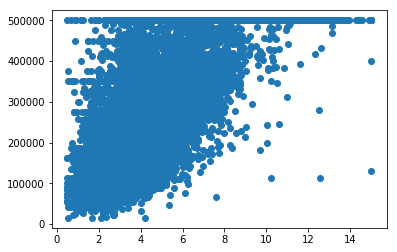

In [3]:
plt.scatter(df['median_income'], df['median_house_value'])

次に、`pupulation` 列の値と `median_house_value` 列の値をそれぞれ横軸と縦軸にとった散布図を描画します。

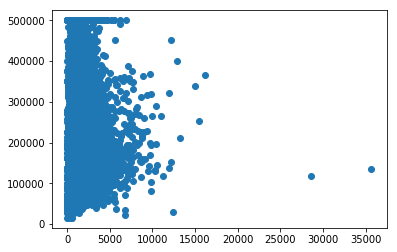

In [4]:
plt.scatter(df['population'], df['median_house_value'])

## ヒストグラム

データ中にどのような値がよく登場しているかという値ごとの頻度を確認するために使われるものに**ヒストグラム (histogram)** があります。

試しに、`median_house_values` 列の値のヒストグラムを描画してみましょう。

(array([ 731., 2958., 3362., 3127., 2291., 1426., 1036.,  629.,  395.,
        1045.]),
 array([ 14999. ,  63499.2, 111999.4, 160499.6, 208999.8, 257500. ,
        306000.2, 354500.4, 403000.6, 451500.8, 500001. ]),
 <a list of 10 Patch objects>)

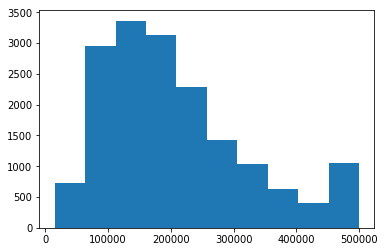

In [5]:
plt.hist(df['median_house_value'])

上図の棒グラフ 1 つ 1 つの青い棒は、**ビン (bin)** と呼ばれ、それぞれの高さはある値の範囲に入っているサンプルの数を表します。
ヒストグラムでは値の範囲を複数指定し、それぞれの範囲に入っているサンプルの個数を描画します。
そのため、その値の範囲の指定を `bins` という引数を用いて行う必要があります。
ただし、この引数はオプショナルなもので、何も与えなかった場合はビンの数が自動的に決定されます。
この引数に整数を与えた場合は、`bins` 個のビンを値の範囲に対して等間隔に作成します。

(array([  8.,  12.,  51., 214., 446., 559., 463., 658., 704., 574., 685.,
        588., 675., 670., 744., 799., 627., 684., 584., 433., 500., 547.,
        484., 406., 358., 370., 362., 267., 257., 166., 184., 197., 199.,
        216., 240., 159., 134., 126.,  98., 112.,  88.,  80.,  69.,  67.,
         91.,  50.,  42.,  44.,  42., 867.]),
 array([ 14999.  ,  24699.04,  34399.08,  44099.12,  53799.16,  63499.2 ,
         73199.24,  82899.28,  92599.32, 102299.36, 111999.4 , 121699.44,
        131399.48, 141099.52, 150799.56, 160499.6 , 170199.64, 179899.68,
        189599.72, 199299.76, 208999.8 , 218699.84, 228399.88, 238099.92,
        247799.96, 257500.  , 267200.04, 276900.08, 286600.12, 296300.16,
        306000.2 , 315700.24, 325400.28, 335100.32, 344800.36, 354500.4 ,
        364200.44, 373900.48, 383600.52, 393300.56, 403000.6 , 412700.64,
        422400.68, 432100.72, 441800.76, 451500.8 , 461200.84, 470900.88,
        480600.92, 490300.96, 500001.  ]),
 <a list of 50 Patch ob

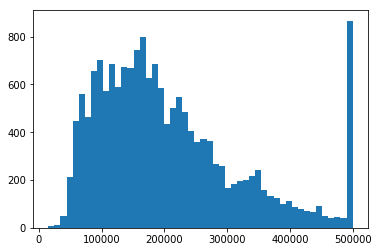

In [6]:
# bins 引数に値を指定することで、ビンの数を指定できます
plt.hist(df['median_house_value'], bins=50)

上図から、`median_house_value` が 500,000 付近の値をとるサンプルが突出して多く存在していることが分かります。

## 箱ひげ図

**箱ひげ図 (box plot)** は、値のばらつきをわかりやすく表現するための図です。
`df.describe()` で確認できるような、いくつかの統計値をまとめて可視化するものです。
箱ひげ図は、**五数要約 （five-number summary）** と呼ばれる以下の統計量をまとめて表すものです。

- 最小値 (minimum)
- 第 1 四分位点 (lower quartile)
- 中央値 (median)
- 第 3 四分位点 (upper quartile)
- 最大値 (maximum)

描画には、`plt.boxplot()` を用います。

{'whiskers': [<matplotlib.lines.Line2D at 0x11aaf73c8>,
 'caps': [<matplotlib.lines.Line2D at 0x11aaf7a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x11aaf7278>],
 'medians': [<matplotlib.lines.Line2D at 0x11a9a7160>],
 'fliers': [<matplotlib.lines.Line2D at 0x11a9a74a8>],
 'means': []}

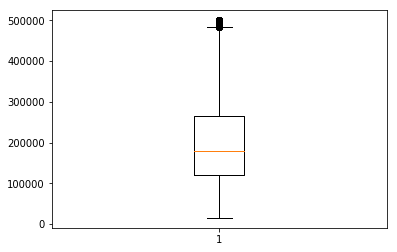

In [7]:
plt.boxplot(df['median_house_value'])

{'whiskers': [<matplotlib.lines.Line2D at 0x11ab6fcc0>,
 'caps': [<matplotlib.lines.Line2D at 0x11ab7b390>,
 'boxes': [<matplotlib.lines.Line2D at 0x11ab6fb70>,
 'medians': [<matplotlib.lines.Line2D at 0x11ab7ba20>,
 'fliers': [<matplotlib.lines.Line2D at 0x11ab7bd68>,
 'means': []}

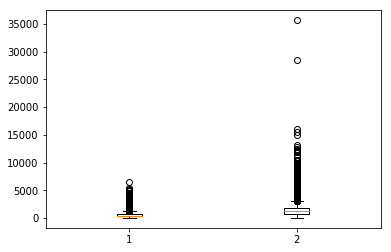

In [8]:
# 複数指定する場合は、タプルを用います
plt.boxplot((df['total_bedrooms'], df['population']))

## 折れ線グラフ

折れ線グラフは、時系列データなどを表示する際に便利なグラフです。
`plt.plot()` を用いて描画します。

`plt.plot(y)` のように引数が 1 つの場合は、`y` の要素が縦軸の値に対応し、 横軸は要素のインデックスとなります。

それでは、NumPy を用いて作成したデータを、`plt.plot()` で表示してみましょう。

In [9]:
import numpy as np

# [0,10]の間を100分割して数値を返す
x = np.linspace(0, 10, 100)

# x の値にランダムノイズを加える
y = x + np.random.randn(100)

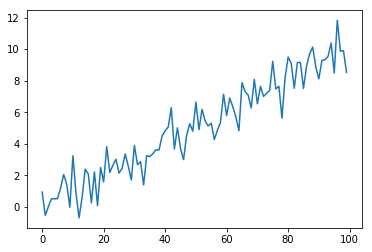

In [10]:
plt.plot(y)

`plt.plot(x, y)` のように引数を 2 つ与える場合は、`x` が横軸、`y` が縦軸に対応します。

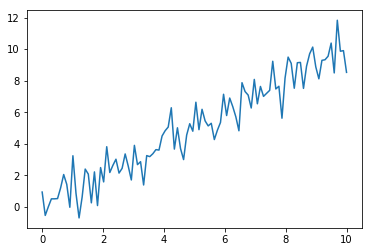

In [11]:
plt.plot(x, y)

## グラフの調整

Matplotlib では横軸や縦軸に文字列でラベルを指定したり、グラフの大きさの調整、また直線・曲線・点の色や大きさ、文字の色や大きさの調整など、様々な見た目に関する設定を細かく指定することができます。

## seaborn

統計図の作成を簡単に行えるように Matplotlib をベースに作られたライブラリに [seaborn](https://seaborn.pydata.org/) というものがあります。

`seaborn` パッケージは、`sns` という別名で読み込まれるのが一般的です。

In [12]:
import seaborn as sns

データの分布を確認する際は、Matplotlib のヒストグラムよりも使い方がシンプルかつ見やすい図を作成することができる `sns.distplot()` がおすすめです。

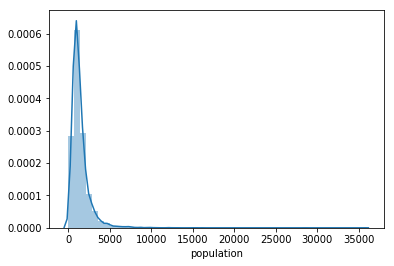

In [13]:
sns.distplot(df['population'])

また、描画が完了するまで少し時間がかかってしまいますが、与えられたデータフレームオブジェクトの各列の全てのペアでの散布図をグリッド状に描画し、様々な変数間の相関関係を視覚的に見渡すことができる `sns.pairplot()` も便利です。

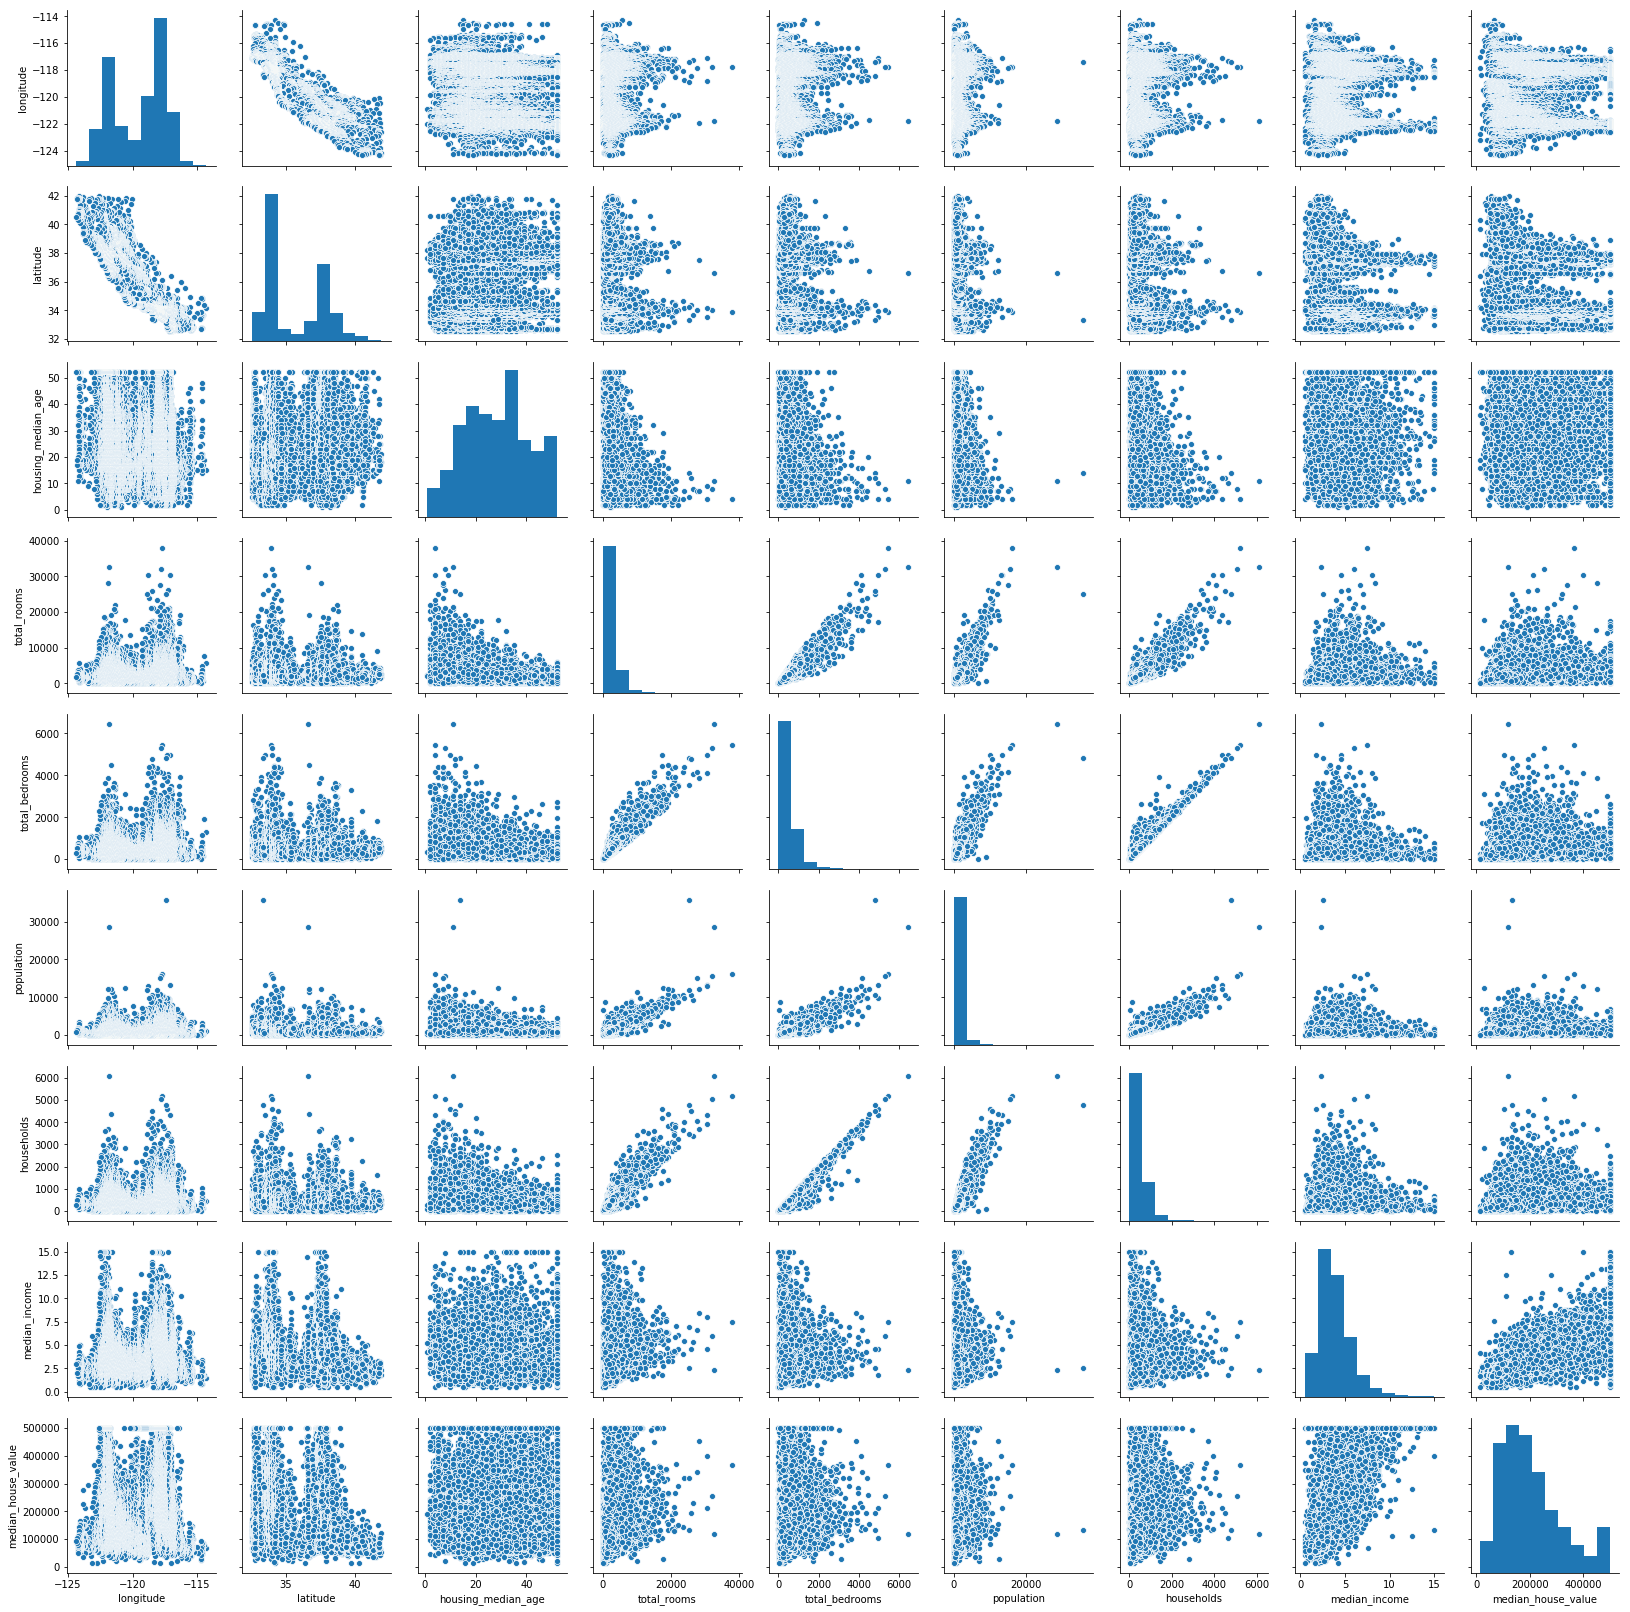

In [14]:
sns.pairplot(df)

seaborn には他にも様々な種類のグラフを描画する機能があります。